# **10장 순환신경망에서 어텐션으로**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **10.4 텐서플로우를 이용한 간단한 RNN 모델 만들기**


In [1]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [6]:
for i in range(size):
    # 매번 랜덤 간격(step: 0~1) 생성
    step = np.random.rand()

    # 등간 시퀀스 생성: 시작=i/10, 끝=시작 + step*(seq_len-1), seq_len 포인트
    start = i / 10.0
    c = np.linspace(start, start + step * (seq_len - 1), seq_len)

    # X에 시퀀스 저장 (차원 추가: (seq_len,) → (seq_len, 1))
    X[i] = c[:, np.newaxis]

    # Y에 다음 숫자 저장: 시작 + step * seq_len
    Y[i] = start + step * seq_len

# 예시 출력: 처음 5개 시퀀스와 Y 값 (실행할 때마다 랜덤으로 다름)
for i in range(5):
    print(f"X[{i}]: {X[i].flatten()}, Y[{i}]: {Y[i]}")

X[0]: [0.         0.93200084 1.86400169], Y[0]: 2.796002528049372
X[1]: [0.1        0.61718202 1.13436405], Y[1]: 1.6515460745405175
X[2]: [0.2        0.5704492  0.94089841], Y[2]: 1.3113476096619399
X[3]: [0.3        0.87509221 1.45018442], Y[3]: 2.025276632230381
X[4]: [0.4        1.27803502 2.15607005], Y[4]: 3.0341050688293043


In [7]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer ='adam', loss = 'mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

### **10.5 RNN을 이용한 순차 데이터 예측**

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 32.3588
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.2282 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.0452 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.0419 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.7488 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.6830 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.3911 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.9004 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.3364 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.6166 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.7559 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3803 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8716 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.1870 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1988 
Epo

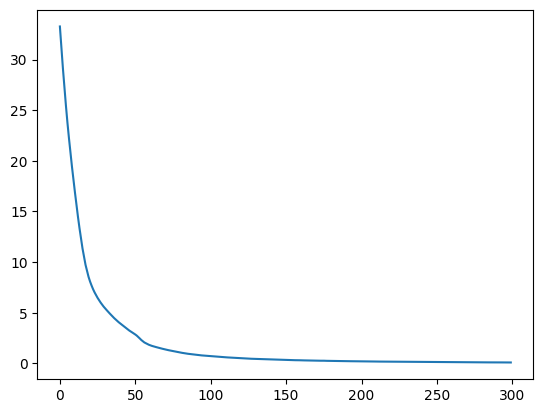

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


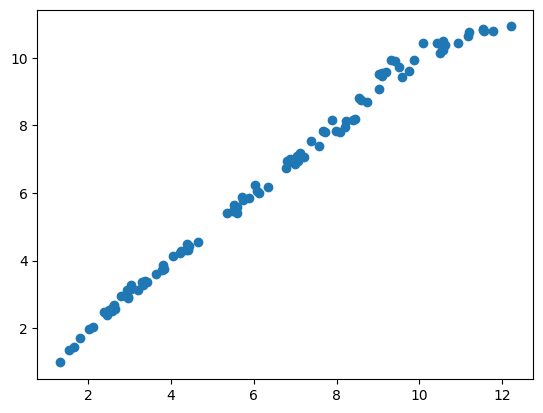

In [8]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [9]:
print(model.predict(np.array([[[8.2], [8.3], [8.4]]])))
print(model.predict(np.array([[[10.1], [10.15], [10.2]]])))
print(model.predict(np.array([[[1.0], [1.5], [2.0]]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[[8.952096]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[10.551719]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2.4365788]]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,305 (259.00 KB)

 Trainable params: 66,305 (259.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 44.1991
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5582 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3208 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2680 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2778 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6029 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8221 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3627 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0494 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8451 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6645 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5397 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4460 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4034 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3447 
Epoch 16/300
4/4 

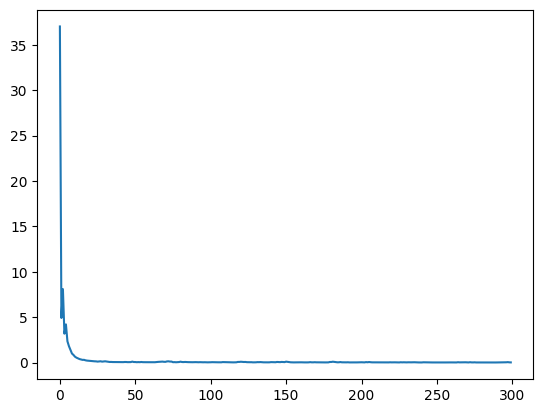

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


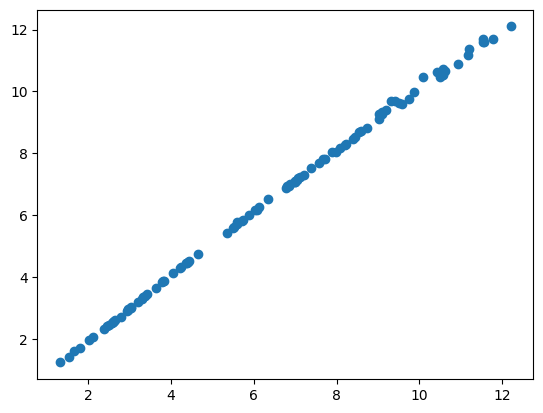

In [10]:
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [11]:
print(model256.predict(np.array([[[8.2], [8.3], [8.4]]])))
print(model256.predict(np.array([[[10.1], [10.15], [10.2]]])))
print(model256.predict(np.array([[[1.0], [1.5], [2.0]]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
[[8.7233]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[10.677429]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[2.4683025]]


### **10.6 RNN을 다층 구조로 만들어 파라미터는 줄이기**

In [ ]:
model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 3, 34)          │         1,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 3, 34)          │         2,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 3, 34)          │         2,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ (None, 34)             │         2,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,297 (32.41 KB)

 Trainable params: 8,297 (32.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - loss: 41.5594
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.9006
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.7916
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.0022
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4090
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2443
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4260
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2529
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.6772
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8538
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2977
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0128
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6913
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0095
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1921
Epoch 16/300


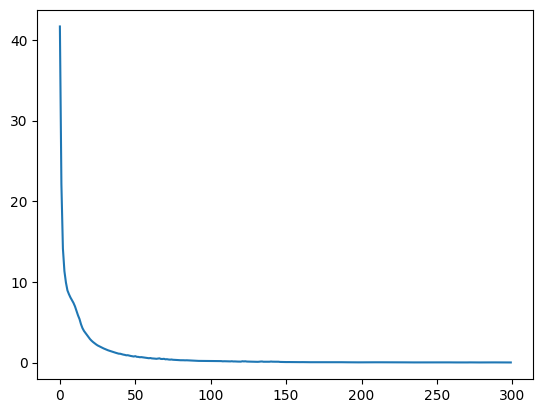

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step


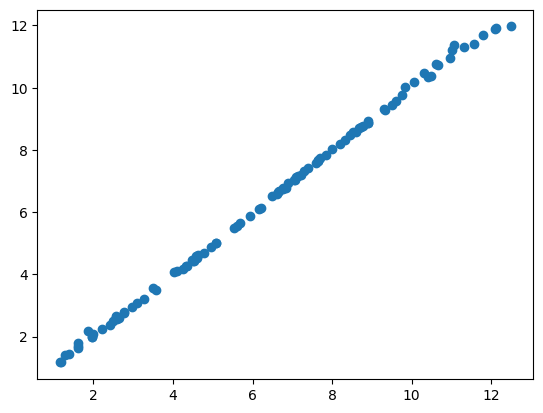

In [ ]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [ ]:
print(model_multilayer.predict(np.array([[[8.2], [8.3], [8.4]]])))
print(model_multilayer.predict(np.array([[[10.1], [10.15], [10.2]]])))

print(model_multilayer.predict(np.array([[[1.0], [1.5], [2.0]]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
[[8.528653]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[10.749546]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[2.564086]]
